# Задание 1

В предложенном файле находится набор синтетических данных. Данные описывают 60 объектов, каждый из которых обладает 10 признаками. Ваша задача, используя метод главных компонент, перейти к новым координатам и найти следующие параметры:
- Координату первого объекта относительно первой главной компоненты
- Координату первого объекта относительно второй главной компоненты
- Долю объясненной дисперсии при использовании первых двух главных компонент
- Какое минимальное количество главных компонент необходимо использовать, чтобы доля объясненной дисперсии превышала 0.85
- Какое количество групп объектов можно выделить, если использовать только первые две главных компоненты?

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
arr = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
data = pd.read_csv('https://raw.githubusercontent.com/mihneh/ITMO_ML_labs/main/lab_PCA/41_25.csv', names=arr)
data.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,-7.740340,9.277438,-4.854174,-1.202028,-12.348254,-10.066532,14.795244,19.147509,-16.013266,-9.549785
1,-11.313491,-21.953282,8.975190,-23.328462,-15.637988,6.108675,-13.792329,9.819516,19.525042,-3.615621
2,5.473343,12.630822,-5.005415,-4.796412,-15.365238,-3.247915,-6.766479,4.724994,-20.113874,10.556540
3,3.979157,12.917397,-3.554173,-5.197877,-13.169246,-2.132375,-7.997947,5.541322,-18.522509,11.654845
4,-13.582469,-20.957017,9.967119,-24.720595,-20.364866,4.937101,-17.882545,9.390128,19.921203,-4.903220


Координата первого объекта относительно первой главной компоненты: 22.907687843455815
Координата первого объекта относительно второй главной компоненты: -14.301239289499716
Доля объясненной дисперсии при использовании первых 2 ГК:  0.7902653946044564
Min кол-во ГК, чтобы доля объясненной дисперсии превышала 0.85 =  3


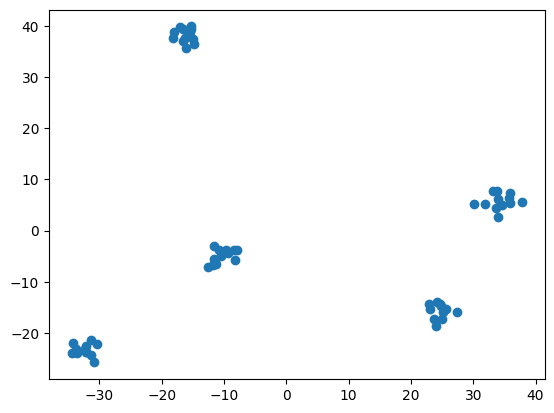

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4, svd_solver='full')
XPCAreduced = pca.fit_transform(data)

print('Координата первого объекта относительно первой главной компоненты:', XPCAreduced[0][0])
print('Координата первого объекта относительно второй главной компоненты:', XPCAreduced[0][1])

print('Доля объясненной дисперсии при использовании первых 2 ГК: ', pca.explained_variance_ratio_.cumsum()[1])
ratio = list(pca.explained_variance_ratio_.cumsum())
for i in ratio:
  if i >= 0.85:
    print('Min кол-во ГК, чтобы доля объясненной дисперсии превышала 0.85 = ', ratio.index(i)+1)
    break

fig, ax = plt.subplots()
ax.scatter(XPCAreduced[:,0], XPCAreduced[:,1],)
plt.show()

Используя только первые две компоненты, можно выделить 4 группы объектов.

# Задание 2

Для прохода на новогодний корпоратив в ИТМО при входе нужно отгадать «логотип мероприятия». Для получения изображения логотипа необходимо по первым десяти главным компонентам восстановить исходное изображение (в качестве пригласительных рассылались матрица счётов и матрица весов первых десяти ГК).

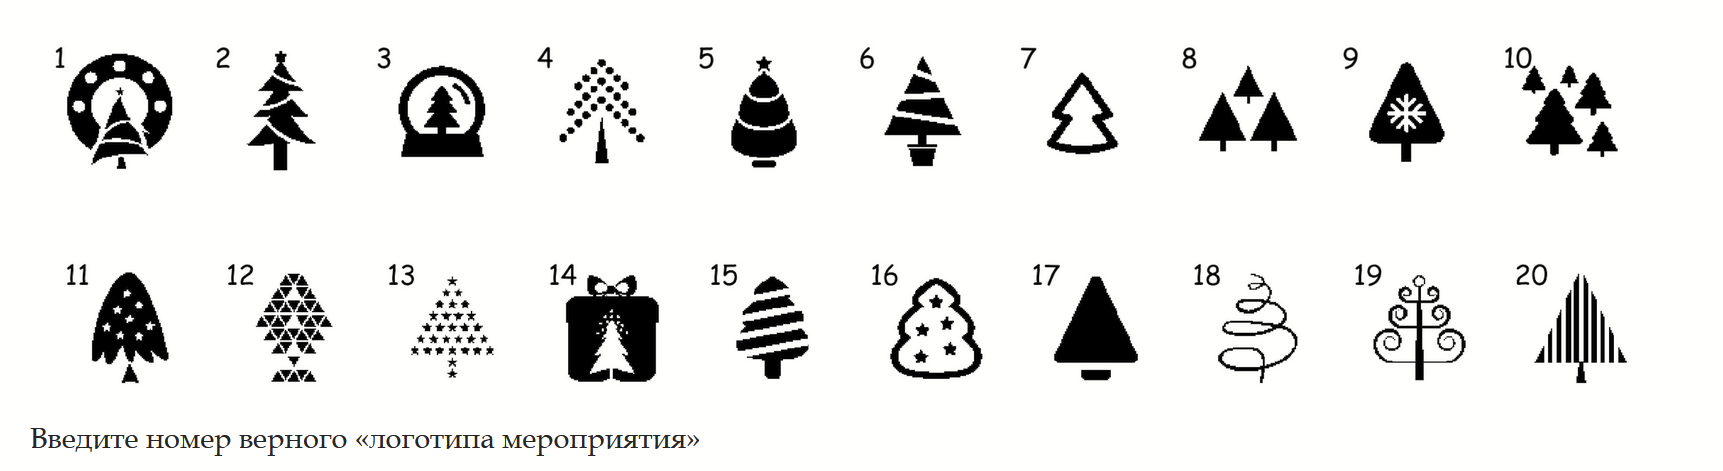

In [28]:
cols = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
X_reduced = pd.read_csv('https://raw.githubusercontent.com/mihneh/ITMO_ML_labs/main/lab_PCA/X_reduced_456.csv', delimiter = ';', names=cols)
X_reduced.head()


,1,2,3,4,5,6,7,8,9,10
0,-304.785013,-80.010167,-136.255264,-17.798607,-24.012212,3.06861,15.270622,9.40663,8.764388,-3.793989
1,-304.785013,-80.010167,-136.255264,-17.798607,-24.012212,3.06861,15.270622,9.40663,8.764388,-3.793989
2,-304.785013,-80.010167,-136.255264,-17.798607,-24.012212,3.06861,15.270622,9.40663,8.764388,-3.793989
3,-304.785013,-80.010167,-136.255264,-17.798607,-24.012212,3.06861,15.270622,9.40663,8.764388,-3.793989
4,-304.785013,-80.010167,-136.255264,-17.798607,-24.012212,3.06861,15.270622,9.40663,8.764388,-3.793989


In [29]:
X_loadings = pd.read_csv('https://raw.githubusercontent.com/mihneh/ITMO_ML_labs/main/lab_PCA/X_loadings_456.csv', delimiter = ';', names=cols)
X_loadings.head()

,1,2,3,4,5,6,7,8,9,10
0,-6.238565e-18,-5.674130e-18,-2.293371e-17,-5.135538e-18,-1.192463e-17,2.400842e-18,1.306027e-17,1.271542e-17,1.449213e-17,-9.758364e-18
1,-2.220446e-16,-2.775558e-17,5.551115e-17,1.595946e-16,-1.387779e-16,-2.896988e-16,1.179612e-16,2.532696e-16,2.393918e-16,-3.937822e-16
2,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-2.775558e-17,-9.020562e-17,1.387779e-17,-6.938894e-18,-1.387779e-17,8.326673e-17
3,-0.000000e+00,1.110223e-16,-2.220446e-16,-2.775558e-17,-2.220446e-16,-1.387779e-17,1.110223e-16,8.326673e-17,0.000000e+00,-2.081668e-17
4,-0.000000e+00,-0.000000e+00,-5.551115e-17,0.000000e+00,-0.000000e+00,5.551115e-17,5.551115e-17,1.110223e-16,-1.110223e-16,-1.665335e-16


Размерность матрицы исходных данных:  (100, 100)


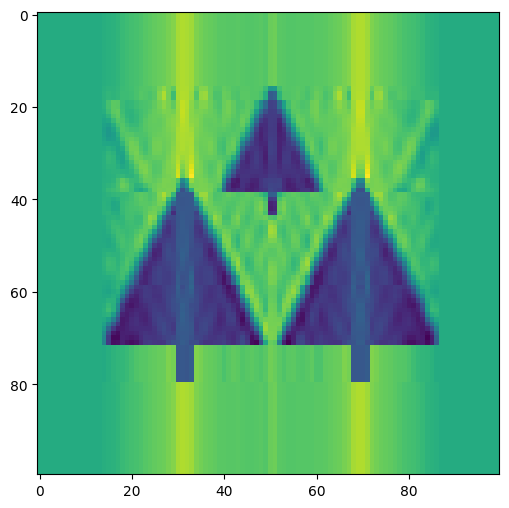

In [30]:
F = np.dot(X_reduced, np.transpose(X_loadings))
print('Размерность матрицы исходных данных: ', F.shape)
fig, ax = plt.subplots()
ax.imshow(F)
fig.set_figwidth(6)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"
plt.show()

Номер верного «логотипа мероприятия» - 8